Model R² on test data: 0.972
Coefficients:
  Gamma Ray:     +0.694
  Resistivity:   +0.563
  Density:       -0.871


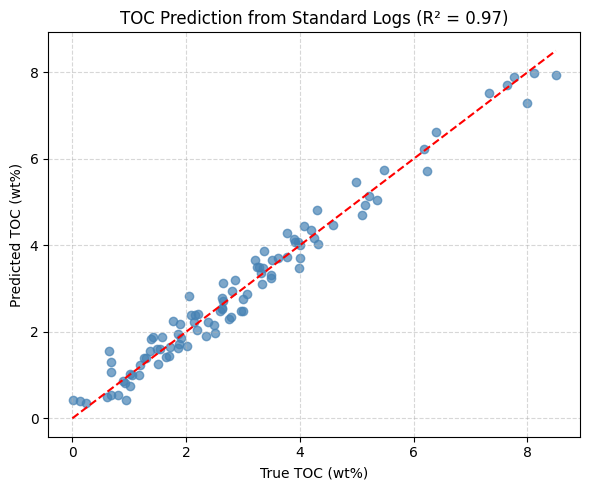

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score


# ----------------------------
# Step 1: load data from CSV
# ----------------------------
df = pd.read_csv('synthetic_well_logs.csv')

# Split into train/test (first 300 = train, last 100 = test)
n_train = 300
n_test = 100

train_df = df.iloc[:n_train]
test_df = df.iloc[n_train:]

X_train = train_df[['GammaRay', 'Resistivity', 'Density']].values
y_train = train_df['TOC'].values

X_test = test_df[['GammaRay', 'Resistivity', 'Density']].values
y_test = test_df['TOC'].values

# ----------------------------
# Step 2: Standardize and train model
# ----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = ElasticNetCV(cv=5, random_state=42, max_iter=2000)
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)

print(f"Model R² on test data: {r2:.3f}")
print(f"Coefficients:")
print(f"  Gamma Ray:     {model.coef_[0]:+.3f}")
print(f"  Resistivity:   {model.coef_[1]:+.3f}")
print(f"  Density:       {model.coef_[2]:+.3f}")

# ----------------------------
# Step 3: Plot results
# ----------------------------
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='steelblue')
plt.plot([0, y_test.max()], [0, y_test.max()], 'r--', lw=1.5)
plt.xlabel('True TOC (wt%)')
plt.ylabel('Predicted TOC (wt%)')
plt.title(f'TOC Prediction from Standard Logs (R² = {r2:.2f})')
plt.grid(True, ls='--', alpha=0.5)
plt.tight_layout()
plt.savefig('toc_from_logs.png', dpi=300, bbox_inches='tight')
plt.show()